# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
data = pd.read_csv('./train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [3]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
#Смотрим 5 случайных строк в датасете
data.loc[np.random.randint(data.shape[0], size = 5)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
439,51,60.15,3077,Female,0,No,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),0
3852,1,80.05,80.05,Female,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,1
3337,1,20.05,20.05,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4920,11,44.65,472.25,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
2428,49,59.75,2934.3,Female,0,No,No,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),1


In [5]:
#Смотрим количество nan в каждой колонке
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Ни в одной колонке таблицы нет nan

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [6]:
#В колонке TotalSpent содержатся днные неконвертируемые в числовой тип (' ')
badType = data[data['TotalSpent'] == ' '].index
data = data.drop(badType) #Удалим их
data.reset_index(drop = True, inplace = True) #Введем новую нумерацию после удаления строк
data[num_cols] = data[num_cols].astype('float32') #Преобразуем данные в тип float32

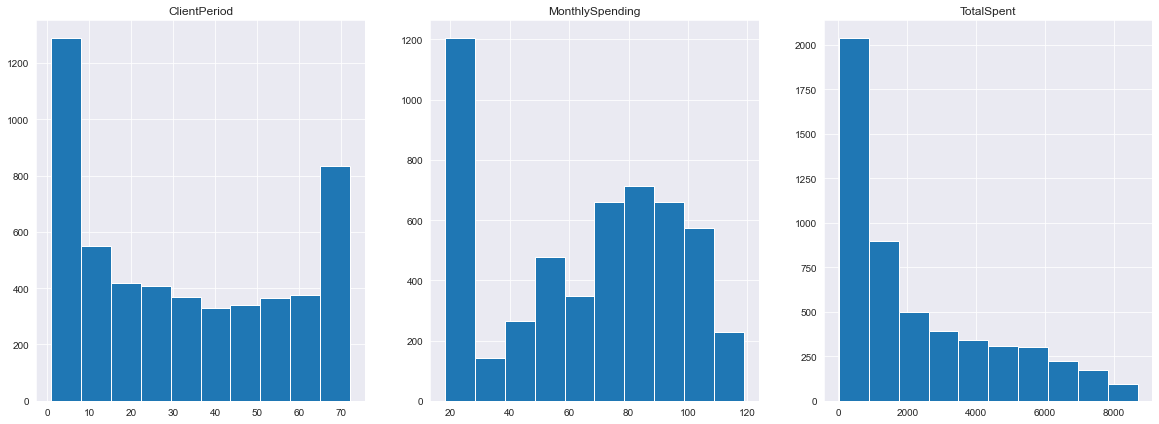

In [7]:
#Построим гистограммы для числовых признаков
import seaborn as sns
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 3,  figsize=(20, 7))
for cols in range(3):
    ax[cols].hist(data[num_cols[cols]])
    ax[cols].set_title(num_cols[cols])

In [8]:
#Выведем количество каждого значения для каждого категориального признака 
for col in cat_cols:
    print(data[col].value_counts())
    print('\n')

Male      2651
Female    2622
Name: Sex, dtype: int64


0    4431
1     842
Name: IsSeniorCitizen, dtype: int64


No     2704
Yes    2569
Name: HasPartner, dtype: int64


No     3676
Yes    1597
Name: HasChild, dtype: int64


Yes    4754
No      519
Name: HasPhoneService, dtype: int64


No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64


Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64


No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64


No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dtype: int64


No                     2316
Yes                    1820
No internet service    1137
Name: HasDeviceProtection, dtype: int64


No                     2603
Yes                    1533
No internet service    1137
Name: HasTechSupportAccess,

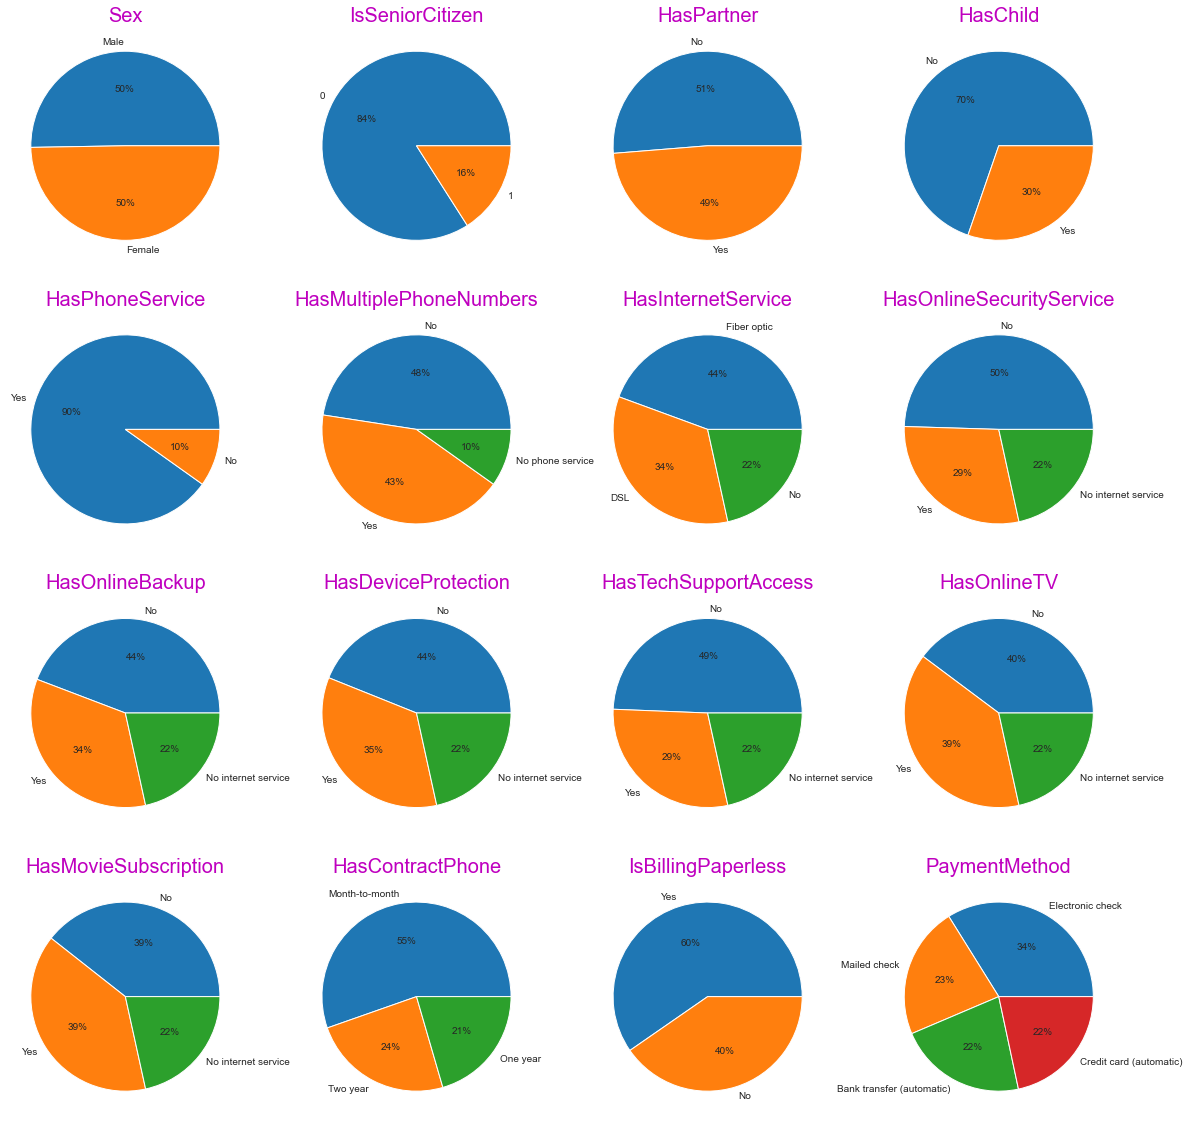

In [9]:
#Круговые диаграммы для каждого категориального признака
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for i, axi in enumerate(ax.flat):
    axi.pie(data[cat_cols[i]].value_counts(), autopct = '%.0f%%', labels = data[cat_cols[i]].value_counts().index)
    axi.set(xticks=[], yticks=[])
    axi.set_title(cat_cols[i], fontdict = {'fontsize': 20,
        'color': 'm',})

In [10]:
#Проверяем сбалансированы ли классы
data['Churn'].value_counts()

0    3889
1    1384
Name: Churn, dtype: int64

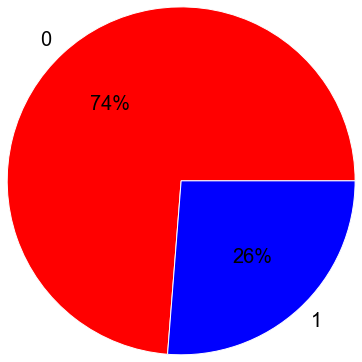

In [11]:
plt.pie(data['Churn'].value_counts(), labels = data['Churn'].value_counts().index,autopct = '%.0f%%', radius=2, colors = ['r', 'b'], textprops ={'fontsize': 20,
        'color': 'k',});
#Классы несбалансированы, но не слишком сильно

In [12]:
#Напоминаю, что пункт 3 опционален

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [14]:
#Создадим препроцессор для отдельной предобработки числовых и категориальных данных
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])
#Создадим конвейер для объединения препроцессора и логистической регрессии
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
#Сделаем решетчатый поиск по гиперпараметру C с применением кросс-валидации
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring = 'roc_auc', verbose=10)

In [15]:
#Так как тренировочная выборка заранее отложена организаторами использование train_test_split излишне
grid.fit(data[feature_cols], data[target_col]);

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START logisticregression__C=0.001.................................
[CV 1/5; 1/6] END ..logisticregression__C=0.001;, score=0.848 total time=   0.0s
[CV 2/5; 1/6] START logisticregression__C=0.001.................................
[CV 2/5; 1/6] END ..logisticregression__C=0.001;, score=0.827 total time=   0.0s
[CV 3/5; 1/6] START logisticregression__C=0.001.................................
[CV 3/5; 1/6] END ..logisticregression__C=0.001;, score=0.833 total time=   0.0s
[CV 4/5; 1/6] START logisticregression__C=0.001.................................
[CV 4/5; 1/6] END ..logisticregression__C=0.001;, score=0.851 total time=   0.0s
[CV 5/5; 1/6] START logisticregression__C=0.001.................................
[CV 5/5; 1/6] END ..logisticregression__C=0.001;, score=0.827 total time=   0.0s
[CV 1/5; 2/6] START logisticregression__C=0.01..................................
[CV 1/5; 2/6] END ...logisticregression__C=0.01;,

In [16]:
#Лучшее значение гиперпараметра C для логистической регрессии
grid.best_params_

{'logisticregression__C': 100}

In [17]:
#Лучшее значение метрики roc_auc для логистической регрессии после подбора гиперпараметра C
grid.best_score_.round(3)

0.845

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [18]:
import catboost
#Выделяем тренировочную и валидационную выборку
X_train, X_valid, y_train, y_valid = train_test_split(data[feature_cols], data[target_col], train_size=0.7, 
                                                      random_state=42, shuffle=False)
#Тестируем catboost со стандартными параметрами
boosting_model = catboost.CatBoostClassifier(n_estimators=None, 
                                             cat_features=cat_cols, eval_metric='AUC')
boosting_model.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=10)

Learning rate set to 0.043752
0:	test: 0.7980150	best: 0.7980150 (0)	total: 162ms	remaining: 2m 42s
10:	test: 0.8332733	best: 0.8332733 (10)	total: 290ms	remaining: 26.1s
20:	test: 0.8389129	best: 0.8389129 (20)	total: 409ms	remaining: 19s
30:	test: 0.8401471	best: 0.8404404 (26)	total: 523ms	remaining: 16.4s
40:	test: 0.8417377	best: 0.8417377 (40)	total: 646ms	remaining: 15.1s
50:	test: 0.8429985	best: 0.8431115 (47)	total: 764ms	remaining: 14.2s
60:	test: 0.8435311	best: 0.8436482 (54)	total: 895ms	remaining: 13.8s
70:	test: 0.8442174	best: 0.8445290 (65)	total: 1.02s	remaining: 13.4s
80:	test: 0.8449191	best: 0.8449598 (79)	total: 1.15s	remaining: 13s
90:	test: 0.8449639	best: 0.8450739 (85)	total: 1.27s	remaining: 12.7s
100:	test: 0.8453101	best: 0.8453213 (99)	total: 1.4s	remaining: 12.5s
110:	test: 0.8452785	best: 0.8453213 (99)	total: 1.52s	remaining: 12.2s
120:	test: 0.8454191	best: 0.8455413 (116)	total: 1.62s	remaining: 11.8s
130:	test: 0.8457236	best: 0.8457236 (130)	total:

In [19]:
#Тестируем catboost с решетчатым поиском по числу деревьев(n_estimators или num_trees) и скорости обучения(learninr_rate)
param_grid2 = {'n_estimators': [50, 100, 500], 'learning_rate': [0.001, 0.01, 0.1],}
grid2 = GridSearchCV(catboost.CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC'),scoring='roc_auc', param_grid=param_grid2, cv=None, verbose=10)
grid2.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=10)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START learning_rate=0.001, n_estimators=50........................
0:	test: 0.7782418	best: 0.7782418 (0)	total: 8.16ms	remaining: 400ms
10:	test: 0.7976077	best: 0.7987462 (6)	total: 91.7ms	remaining: 325ms
20:	test: 0.8012829	best: 0.8017208 (19)	total: 178ms	remaining: 245ms
30:	test: 0.8032422	best: 0.8032422 (30)	total: 262ms	remaining: 161ms
40:	test: 0.8036231	best: 0.8036496 (35)	total: 347ms	remaining: 76.1ms
49:	test: 0.8027636	best: 0.8036496 (35)	total: 422ms	remaining: 0us

bestTest = 0.8036495503
bestIteration = 35

Shrink model to first 36 iterations.
[CV 1/5; 1/9] END learning_rate=0.001, n_estimators=50;, score=0.821 total time=   0.6s
[CV 2/5; 1/9] START learning_rate=0.001, n_estimators=50........................
0:	test: 0.7637955	best: 0.7637955 (0)	total: 8.33ms	remaining: 408ms
10:	test: 0.7951749	best: 0.7968501 (5)	total: 94.8ms	remaining: 336ms
20:	test: 0.8007982	best: 0.8010843 (19)	to

80:	test: 0.8076608	best: 0.8077983 (78)	total: 696ms	remaining: 163ms
90:	test: 0.8080610	best: 0.8080916 (89)	total: 780ms	remaining: 77.1ms
99:	test: 0.8077912	best: 0.8080916 (89)	total: 854ms	remaining: 0us

bestTest = 0.8080915779
bestIteration = 89

Shrink model to first 90 iterations.
[CV 5/5; 2/9] END learning_rate=0.001, n_estimators=100;, score=0.816 total time=   1.0s
[CV 1/5; 3/9] START learning_rate=0.001, n_estimators=500.......................
0:	test: 0.7838722	best: 0.7838722 (0)	total: 11.7ms	remaining: 5.82s
10:	test: 0.8065875	best: 0.8073859 (7)	total: 122ms	remaining: 5.41s
20:	test: 0.8102790	best: 0.8107759 (18)	total: 237ms	remaining: 5.4s
30:	test: 0.8094816	best: 0.8107759 (18)	total: 342ms	remaining: 5.18s
40:	test: 0.8149776	best: 0.8149776 (40)	total: 458ms	remaining: 5.13s
50:	test: 0.8195755	best: 0.8195755 (50)	total: 555ms	remaining: 4.88s
60:	test: 0.8216875	best: 0.8216875 (60)	total: 662ms	remaining: 4.76s
70:	test: 0.8230582	best: 0.8230582 (70)	t

0:	test: 0.7776715	best: 0.7776715 (0)	total: 12.2ms	remaining: 6.1s
10:	test: 0.8129521	best: 0.8142699 (5)	total: 122ms	remaining: 5.43s
20:	test: 0.8159369	best: 0.8159369 (20)	total: 236ms	remaining: 5.38s
30:	test: 0.8169960	best: 0.8172526 (25)	total: 352ms	remaining: 5.33s
40:	test: 0.8156956	best: 0.8172526 (25)	total: 461ms	remaining: 5.16s
50:	test: 0.8158626	best: 0.8172526 (25)	total: 563ms	remaining: 4.96s
60:	test: 0.8177058	best: 0.8177058 (60)	total: 675ms	remaining: 4.86s
70:	test: 0.8226570	best: 0.8226570 (70)	total: 790ms	remaining: 4.77s
80:	test: 0.8246540	best: 0.8246540 (80)	total: 904ms	remaining: 4.67s
90:	test: 0.8273241	best: 0.8273241 (90)	total: 1s	remaining: 4.51s
100:	test: 0.8290227	best: 0.8290227 (100)	total: 1.13s	remaining: 4.48s
110:	test: 0.8298740	best: 0.8298740 (110)	total: 1.25s	remaining: 4.37s
120:	test: 0.8308638	best: 0.8308638 (120)	total: 1.37s	remaining: 4.3s
130:	test: 0.8312142	best: 0.8313343 (126)	total: 1.49s	remaining: 4.2s
140:	t

60:	test: 0.8263342	best: 0.8263342 (60)	total: 696ms	remaining: 5.01s
70:	test: 0.8277497	best: 0.8277660 (69)	total: 808ms	remaining: 4.88s
80:	test: 0.8271540	best: 0.8279167 (73)	total: 917ms	remaining: 4.74s
90:	test: 0.8275349	best: 0.8279167 (73)	total: 1.03s	remaining: 4.62s
100:	test: 0.8278923	best: 0.8279463 (94)	total: 1.14s	remaining: 4.5s
110:	test: 0.8277935	best: 0.8279768 (109)	total: 1.26s	remaining: 4.41s
120:	test: 0.8282681	best: 0.8282681 (120)	total: 1.38s	remaining: 4.33s
130:	test: 0.8285756	best: 0.8286978 (124)	total: 1.52s	remaining: 4.28s
140:	test: 0.8288852	best: 0.8289993 (139)	total: 1.65s	remaining: 4.19s
150:	test: 0.8293251	best: 0.8293496 (149)	total: 1.78s	remaining: 4.12s
160:	test: 0.8291296	best: 0.8294361 (152)	total: 1.91s	remaining: 4.03s
170:	test: 0.8291255	best: 0.8294361 (152)	total: 2.03s	remaining: 3.9s
180:	test: 0.8295308	best: 0.8295308 (180)	total: 2.15s	remaining: 3.8s
190:	test: 0.8307274	best: 0.8307274 (190)	total: 2.28s	remaini

50:	test: 0.8065050	best: 0.8069826 (46)	total: 406ms	remaining: 390ms
60:	test: 0.8078207	best: 0.8078207 (60)	total: 489ms	remaining: 312ms
70:	test: 0.8074806	best: 0.8078207 (60)	total: 573ms	remaining: 234ms
80:	test: 0.8078543	best: 0.8078543 (80)	total: 663ms	remaining: 155ms
90:	test: 0.8118126	best: 0.8118126 (90)	total: 739ms	remaining: 73.1ms
99:	test: 0.8143870	best: 0.8143870 (99)	total: 811ms	remaining: 0us

bestTest = 0.8143869961
bestIteration = 99

[CV 2/5; 5/9] END learning_rate=0.01, n_estimators=100;, score=0.828 total time=   1.0s
[CV 3/5; 5/9] START learning_rate=0.01, n_estimators=100........................
0:	test: 0.7681907	best: 0.7681907 (0)	total: 7.94ms	remaining: 786ms
10:	test: 0.8007483	best: 0.8007483 (10)	total: 93.1ms	remaining: 753ms
20:	test: 0.8048980	best: 0.8052911 (19)	total: 175ms	remaining: 658ms
30:	test: 0.8079714	best: 0.8079714 (30)	total: 257ms	remaining: 571ms
40:	test: 0.8093279	best: 0.8093279 (40)	total: 340ms	remaining: 489ms
50:	te

100:	test: 0.8402143	best: 0.8402143 (100)	total: 1.22s	remaining: 4.8s
110:	test: 0.8406502	best: 0.8407296 (105)	total: 1.34s	remaining: 4.71s
120:	test: 0.8410880	best: 0.8410880 (120)	total: 1.47s	remaining: 4.61s
130:	test: 0.8410269	best: 0.8411675 (128)	total: 1.6s	remaining: 4.5s
140:	test: 0.8411328	best: 0.8413019 (133)	total: 1.72s	remaining: 4.38s
150:	test: 0.8413589	best: 0.8413732 (149)	total: 1.86s	remaining: 4.3s
160:	test: 0.8416970	best: 0.8416970 (160)	total: 1.97s	remaining: 4.16s
170:	test: 0.8420259	best: 0.8420259 (170)	total: 2.11s	remaining: 4.05s
180:	test: 0.8419608	best: 0.8421074 (174)	total: 2.22s	remaining: 3.92s
190:	test: 0.8421695	best: 0.8421695 (190)	total: 2.35s	remaining: 3.8s
200:	test: 0.8423131	best: 0.8423141 (197)	total: 2.47s	remaining: 3.68s
210:	test: 0.8427205	best: 0.8427205 (210)	total: 2.6s	remaining: 3.56s
220:	test: 0.8429750	best: 0.8429750 (220)	total: 2.7s	remaining: 3.41s
230:	test: 0.8433172	best: 0.8433172 (229)	total: 2.82s	re

160:	test: 0.8424231	best: 0.8424944 (157)	total: 1.93s	remaining: 4.06s
170:	test: 0.8428406	best: 0.8428406 (170)	total: 2.05s	remaining: 3.94s
180:	test: 0.8429516	best: 0.8431767 (176)	total: 2.17s	remaining: 3.82s
190:	test: 0.8432581	best: 0.8432622 (186)	total: 2.3s	remaining: 3.72s
200:	test: 0.8434272	best: 0.8434537 (194)	total: 2.41s	remaining: 3.58s
210:	test: 0.8438080	best: 0.8438080 (210)	total: 2.52s	remaining: 3.45s
220:	test: 0.8441380	best: 0.8442296 (217)	total: 2.64s	remaining: 3.34s
230:	test: 0.8443905	best: 0.8443905 (230)	total: 2.75s	remaining: 3.21s
240:	test: 0.8444944	best: 0.8444944 (240)	total: 2.86s	remaining: 3.08s
250:	test: 0.8446512	best: 0.8446899 (246)	total: 2.97s	remaining: 2.95s
260:	test: 0.8448753	best: 0.8448753 (260)	total: 3.09s	remaining: 2.83s
270:	test: 0.8448855	best: 0.8448956 (267)	total: 3.2s	remaining: 2.71s
280:	test: 0.8448468	best: 0.8449547 (276)	total: 3.33s	remaining: 2.59s
290:	test: 0.8449853	best: 0.8449853 (290)	total: 3.4

30:	test: 0.8386756	best: 0.8386756 (30)	total: 251ms	remaining: 154ms
40:	test: 0.8407642	best: 0.8412927 (39)	total: 332ms	remaining: 72.8ms
49:	test: 0.8414709	best: 0.8414933 (47)	total: 406ms	remaining: 0us

bestTest = 0.8414933441
bestIteration = 47

Shrink model to first 48 iterations.
[CV 3/5; 7/9] END learning_rate=0.1, n_estimators=50;, score=0.845 total time=   0.6s
[CV 4/5; 7/9] START learning_rate=0.1, n_estimators=50..........................
0:	test: 0.7597761	best: 0.7597761 (0)	total: 8.62ms	remaining: 422ms
10:	test: 0.8118544	best: 0.8118544 (10)	total: 88.4ms	remaining: 313ms
20:	test: 0.8303587	best: 0.8303587 (20)	total: 154ms	remaining: 212ms
30:	test: 0.8373039	best: 0.8373039 (30)	total: 224ms	remaining: 137ms
40:	test: 0.8400768	best: 0.8400768 (40)	total: 296ms	remaining: 64.9ms
49:	test: 0.8429577	best: 0.8429577 (49)	total: 370ms	remaining: 0us

bestTest = 0.8429577264
bestIteration = 49

[CV 4/5; 7/9] END learning_rate=0.1, n_estimators=50;, score=0.832 to

200:	test: 0.8338374	best: 0.8392296 (54)	total: 2.64s	remaining: 3.93s
210:	test: 0.8337376	best: 0.8392296 (54)	total: 2.77s	remaining: 3.79s
220:	test: 0.8325319	best: 0.8392296 (54)	total: 2.9s	remaining: 3.66s
230:	test: 0.8322793	best: 0.8392296 (54)	total: 3.02s	remaining: 3.52s
240:	test: 0.8319209	best: 0.8392296 (54)	total: 3.15s	remaining: 3.38s
250:	test: 0.8315380	best: 0.8392296 (54)	total: 3.28s	remaining: 3.25s
260:	test: 0.8312325	best: 0.8392296 (54)	total: 3.4s	remaining: 3.12s
270:	test: 0.8307376	best: 0.8392296 (54)	total: 3.53s	remaining: 2.98s
280:	test: 0.8309504	best: 0.8392296 (54)	total: 3.66s	remaining: 2.85s
290:	test: 0.8303292	best: 0.8392296 (54)	total: 3.79s	remaining: 2.73s
300:	test: 0.8289646	best: 0.8392296 (54)	total: 3.93s	remaining: 2.6s
310:	test: 0.8281459	best: 0.8392296 (54)	total: 4.06s	remaining: 2.47s
320:	test: 0.8274361	best: 0.8392296 (54)	total: 4.2s	remaining: 2.34s
330:	test: 0.8271958	best: 0.8392296 (54)	total: 4.34s	remaining: 2.

260:	test: 0.8363344	best: 0.8465464 (54)	total: 3.44s	remaining: 3.15s
270:	test: 0.8363812	best: 0.8465464 (54)	total: 3.57s	remaining: 3.02s
280:	test: 0.8360533	best: 0.8465464 (54)	total: 3.71s	remaining: 2.89s
290:	test: 0.8362366	best: 0.8465464 (54)	total: 3.85s	remaining: 2.77s
300:	test: 0.8360696	best: 0.8465464 (54)	total: 4s	remaining: 2.64s
310:	test: 0.8355717	best: 0.8465464 (54)	total: 4.15s	remaining: 2.52s
320:	test: 0.8353435	best: 0.8465464 (54)	total: 4.32s	remaining: 2.41s
330:	test: 0.8355248	best: 0.8465464 (54)	total: 4.47s	remaining: 2.28s
340:	test: 0.8347325	best: 0.8465464 (54)	total: 4.6s	remaining: 2.15s
350:	test: 0.8356144	best: 0.8465464 (54)	total: 4.74s	remaining: 2.01s
360:	test: 0.8347672	best: 0.8465464 (54)	total: 4.86s	remaining: 1.87s
370:	test: 0.8343720	best: 0.8465464 (54)	total: 5s	remaining: 1.74s
380:	test: 0.8336001	best: 0.8465464 (54)	total: 5.14s	remaining: 1.6s
390:	test: 0.8326612	best: 0.8465464 (54)	total: 5.28s	remaining: 1.47s


320:	test: 0.8367214	best: 0.8451655 (56)	total: 4.07s	remaining: 2.27s
330:	test: 0.8362000	best: 0.8451655 (56)	total: 4.21s	remaining: 2.15s
340:	test: 0.8355055	best: 0.8451655 (56)	total: 4.34s	remaining: 2.02s
350:	test: 0.8349494	best: 0.8451655 (56)	total: 4.47s	remaining: 1.9s
360:	test: 0.8344892	best: 0.8451655 (56)	total: 4.6s	remaining: 1.77s
370:	test: 0.8342651	best: 0.8451655 (56)	total: 4.75s	remaining: 1.65s
380:	test: 0.8338089	best: 0.8451655 (56)	total: 4.88s	remaining: 1.52s
390:	test: 0.8344423	best: 0.8451655 (56)	total: 5.01s	remaining: 1.4s
400:	test: 0.8346419	best: 0.8451655 (56)	total: 5.15s	remaining: 1.27s
410:	test: 0.8344403	best: 0.8451655 (56)	total: 5.28s	remaining: 1.14s
420:	test: 0.8337967	best: 0.8451655 (56)	total: 5.42s	remaining: 1.02s
430:	test: 0.8331022	best: 0.8451655 (56)	total: 5.56s	remaining: 890ms
440:	test: 0.8324464	best: 0.8451655 (56)	total: 5.69s	remaining: 761ms
450:	test: 0.8321001	best: 0.8451655 (56)	total: 5.82s	remaining: 6

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x00000215000B75C8>,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [50, 100, 500]},
             scoring='roc_auc', verbose=10)

In [20]:
#Лучшее качество
grid2.best_score_.round(3)

0.845

# Предсказания

In [21]:
#В моем случае качество бустинга и линейной регрессии оказалось практически идентичным (0.845)
best_model = grid2.best_estimator_

In [22]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
#Создание файла с вероятностями
submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index=False)